In [43]:
import sys

sys.path.append("../")

from pharynx_analysis import (pharynx_io as pio, image_processing as ip, experiment, plots)
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from importlib import reload
from skimage import measure, transform
from collections import namedtuple
import pdb
import pandas as pd
from pathlib import Path
import seaborn as sns

In [2]:
reload(pio);
reload(ip);
reload(experiment);

In [4]:
img_path = "/home/sean/wormAnalysis/data/paired_ratios/2017_02_22-HD233_SAY47/2017_02_22-HD233_SAY47.tif"
strain_map_path = "/home/sean/wormAnalysis/data/paired_ratios/2017_02_22-HD233_SAY47/indexer.csv"
strains = pio.load_strain_map_from_disk(strain_map_path)

In [6]:
ex = experiment.PairExperiment(img_path, "TL/470/410/470/410", strains)

/home/sean/.local/share/virtualenvs/python-9A8iwiI2/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


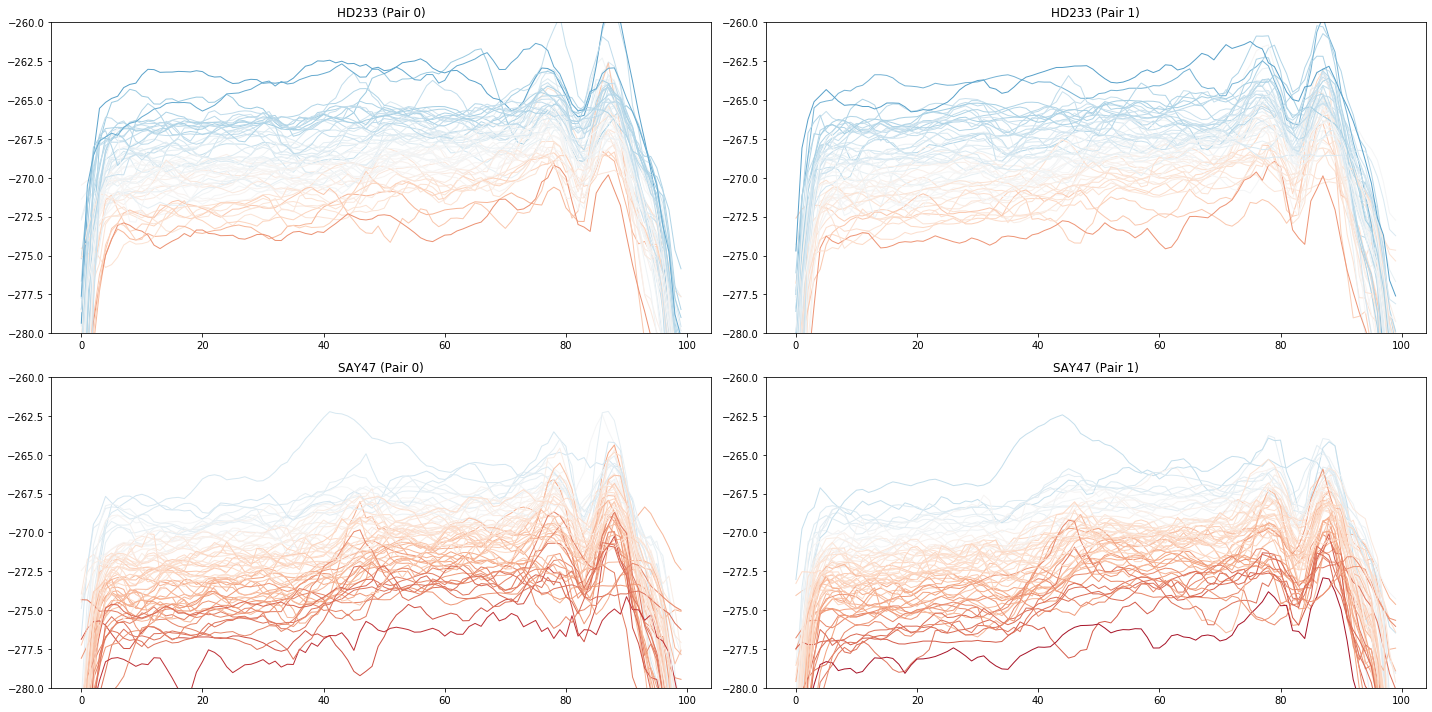

In [7]:
plots.plot_individual_profile_data_by_strain_and_pair(
    ex.e, cmin=-280, cmax=-260, cmap_name='RdBu',
    ylim=[-280, -260], figsize=(20,10)
)

In [101]:
def load_annotation_dataframe(experiment_dir):
    annotation_dir = Path(experiment_dir)
    dfs = []
    for path in annotation_dir.glob('annotations*.csv'):
        df = pd.read_csv(path, header=None, names=['movement', 'pair', 'region'])
        df['pair'] = int(path.stem.split('_')[1][-1])
        df['region'] = path.stem.split('_')[2].split('.')[0]
        df['experiment'] = annotation_dir.stem
        df['animal'] = range(len(df))
        dfs.append(df)
    df = pd.concat(dfs)
    return df.set_index(['experiment', 'animal'])

In [120]:
paired_ratio_experiments_dir = Path('/home/sean/wormAnalysis/data/paired_ratios')
dfs = []
for exp_dir in paired_ratio_experiments_dir.iterdir():
    if exp_dir.is_dir():
        dfs.append(load_annotation_dataframe(exp_dir))
df = pd.concat(dfs)
df.to_csv(paired_ratio_experiments_dir.joinpath('all_movement_annotations.csv'))

In [172]:
df.index.levels[0]

Index(['2017_02_22-HD233_SAY47', '2017_02_23-HD233_HD236',
       '2017_02_27-HD233_HD236', '2017_03_01_HD233_HD236',
       '2017_08_15-HD233_4mM-lev', '2017_08_23-HD233_4mm_lev',
       '2017_08_24-HD233_SAY93', '2017_08_25-HD233_4mm_lev',
       '2017_08_25-HD233_SAY93', '2017_10_12-gld_1_RNAi_SAY88_HD233'],
      dtype='object', name='experiment')

In [178]:
(df[df.pair==1] != df[df.pair==2]).movement

experiment                         animal
2017_02_22-HD233_SAY47             0         False
                                   1         False
                                   2         False
                                   3         False
                                   4         False
                                             ...  
2017_10_12-gld_1_RNAi_SAY88_HD233  116       False
                                   117       False
                                   118       False
                                   119       False
                                   120       False
Name: movement, Length: 3444, dtype: bool

In [179]:
df

movement  pair        region
experiment                        animal                              
2017_02_22-HD233_SAY47            0              0     1  AnteriorBulb
                                  1              0     1  AnteriorBulb
                                  2              0     1  AnteriorBulb
                                  3              0     1  AnteriorBulb
                                  4              0     1  AnteriorBulb
...                                            ...   ...           ...
2017_10_12-gld_1_RNAi_SAY88_HD233 116            0     2           Tip
                                  117            0     2           Tip
                                  118            0     2           Tip
                                  119            0     2           Tip
                                  120            0     2           Tip

[6888 rows x 3 columns]

In [184]:
df.pivot(index='pair', columns='pair', values='movement')

ValueError: The name pair occurs multiple times, use a level number

In [185]:
df.unstack('pair')

KeyError: 'Level pair not found'